## **Description**
### In this notebook, we will develop a predictive model using the final dataset that was prepared in the previous notebook. We will utilize this dataset to identify and analyze the key factors that influence US housing prices. The process will involve data exploration, feature selection, model training, and evaluation to ensure that our predictions are accurate and insightful. By the end of this notebook, we aim to have a robust model that can reliably forecast housing prices based on the identified factors.

## **Dataset Overview**

1. CSUSHPISA: US Housing Price Index
2. Per_Capita_GDP: Per Capita Gross Domestic Product
3. Working_Population: Number of people in the working-age population
4. Houses: Monthly new house supply
5. CPI: Consumer Price Index
6. UNRATE: Unemployment Rate
7. Cons_Materials: Construction Materials Cost
8. FEDFUNDS: Federal Funds Rate
9. Num_Households: Number of Households
10. Income: Average Income
11. Subsidy: Housing Subsidies
12. old_percent: Percentage of the population that is elderly


In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#mounting google drive for fetching the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#loading the final dataset
final_df=pd.read_csv("/content/drive/MyDrive/Datasets/US_House_Price/final_dataset.csv")
final_df.head()

,DATE,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
0,2002-01-01,117.143,2002.0,1.0,50091.000000,182669300.0,4.2,177.7,5.7,142.0,1.73,109297.0,65820.0,24.183,12.287458
1,2002-02-01,117.844,2002.0,2.0,50156.000000,182823900.0,4.0,178.0,5.7,142.2,1.74,109297.0,65820.0,24.183,12.287458
2,2002-03-01,118.687,2002.0,3.0,50221.000000,183081600.0,4.1,178.5,5.7,143.2,1.73,109297.0,65820.0,24.183,12.287458
3,2002-04-01,119.610,2002.0,4.0,50286.000000,183315500.0,4.3,179.3,5.9,143.5,1.75,109297.0,65820.0,24.183,12.287458
4,2002-05-01,120.724,2002.0,5.0,50311.333333,183462600.0,4.0,179.5,5.8,143.8,1.75,109297.0,65820.0,24.183,12.287458


In [4]:
# setting the index as DATE
final_df.set_index('DATE', inplace=True)
final_df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
DATE,,,,,,,,,,,,,,
2002-01-01,117.143,2002.0,1.0,50091.000000,182669300.0,4.2,177.7,5.7,142.0,1.73,109297.0,65820.0,24.183,12.287458
2002-02-01,117.844,2002.0,2.0,50156.000000,182823900.0,4.0,178.0,5.7,142.2,1.74,109297.0,65820.0,24.183,12.287458
2002-03-01,118.687,2002.0,3.0,50221.000000,183081600.0,4.1,178.5,5.7,143.2,1.73,109297.0,65820.0,24.183,12.287458
2002-04-01,119.610,2002.0,4.0,50286.000000,183315500.0,4.3,179.3,5.9,143.5,1.75,109297.0,65820.0,24.183,12.287458
2002-05-01,120.724,2002.0,5.0,50311.333333,183462600.0,4.0,179.5,5.8,143.8,1.75,109297.0,65820.0,24.183,12.287458


In [5]:
#information about the dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2002-01-01 to 2022-12-01
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CSUSHPISA           252 non-null    float64
 1   Year                252 non-null    float64
 2   Month               252 non-null    float64
 3   Per_Capita_GDP      252 non-null    float64
 4   Working_Population  252 non-null    float64
 5   Houses              252 non-null    float64
 6   CPI                 252 non-null    float64
 7   UNRATE              252 non-null    float64
 8   Cons_Materials      252 non-null    float64
 9   FEDFUNDS            252 non-null    float64
 10  Num_Households      252 non-null    float64
 11  Income              252 non-null    float64
 12  Subsidy             252 non-null    float64
 13  old_percent         252 non-null    float64
dtypes: float64(14)
memory usage: 29.5+ KB


In [6]:
#checking the dtypes
final_df.dtypes

CSUSHPISA             float64
Year                  float64
Month                 float64
Per_Capita_GDP        float64
Working_Population    float64
Houses                float64
CPI                   float64
UNRATE                float64
Cons_Materials        float64
FEDFUNDS              float64
Num_Households        float64
Income                float64
Subsidy               float64
old_percent           float64
dtype: object

In [7]:
#statistical description of the dataset
final_df.describe()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,177.870321,2012.000000,6.500000,57049.464286,1.993723e+08,6.040873,227.634663,5.999603,209.573222,1.319008,120770.761905,68776.666667,34.177714,13.946809
std,42.131984,6.067351,3.458922,4166.974559,6.961683e+06,1.958401,28.869229,1.988142,45.902963,1.542732,6496.223206,4512.996725,6.274362,1.540510
min,117.143000,2002.000000,1.000000,50091.000000,1.826693e+08,3.300000,177.700000,3.500000,142.000000,0.050000,109297.000000,63350.000000,24.183000,12.277934
25%,146.766000,2007.000000,3.750000,54205.833333,1.952286e+08,4.575000,205.750000,4.600000,183.225000,0.120000,116011.000000,65760.000000,29.512000,12.507804
50%,170.172000,2012.000000,6.500000,55677.000000,2.015122e+08,5.500000,228.997000,5.550000,206.300000,0.715000,121084.000000,66780.000000,33.283000,13.584437
75%,194.006750,2017.000000,9.250000,60008.250000,2.054681e+08,7.000000,246.482750,7.200000,223.300000,1.935000,126224.000000,72090.000000,37.550000,15.066290
max,304.456000,2022.000000,12.000000,65997.000000,2.075857e+08,12.200000,298.812000,14.800000,353.015000,5.260000,131202.000000,78250.000000,48.021000,17.128121


In [8]:
#checking for null values in dataset
final_df.isna().sum()

CSUSHPISA             0
Year                  0
Month                 0
Per_Capita_GDP        0
Working_Population    0
Houses                0
CPI                   0
UNRATE                0
Cons_Materials        0
FEDFUNDS              0
Num_Households        0
Income                0
Subsidy               0
old_percent           0
dtype: int64

In [9]:
# dropping the Year and Month column
final_df.drop(["Year","Month"],axis=1, inplace=True)
final_df.head()

,CSUSHPISA,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
DATE,,,,,,,,,,,,
2002-01-01,117.143,50091.000000,182669300.0,4.2,177.7,5.7,142.0,1.73,109297.0,65820.0,24.183,12.287458
2002-02-01,117.844,50156.000000,182823900.0,4.0,178.0,5.7,142.2,1.74,109297.0,65820.0,24.183,12.287458
2002-03-01,118.687,50221.000000,183081600.0,4.1,178.5,5.7,143.2,1.73,109297.0,65820.0,24.183,12.287458
2002-04-01,119.610,50286.000000,183315500.0,4.3,179.3,5.9,143.5,1.75,109297.0,65820.0,24.183,12.287458
2002-05-01,120.724,50311.333333,183462600.0,4.0,179.5,5.8,143.8,1.75,109297.0,65820.0,24.183,12.287458


In [10]:
# checking the correlation of different variables
final_df.corr()

,CSUSHPISA,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
CSUSHPISA,1.000000,0.904413,0.619794,0.179710,0.822270,-0.476946,0.898933,0.113803,0.749024,0.831590,0.845096,0.843773
Per_Capita_GDP,0.904413,1.000000,0.852647,0.079706,0.947456,-0.430620,0.918061,-0.104441,0.937857,0.847236,0.931393,0.953277
Working_Population,0.619794,0.852647,1.000000,0.170091,0.925832,-0.083610,0.791889,-0.359326,0.961852,0.584208,0.872173,0.844792
Houses,0.179710,0.079706,0.170091,1.000000,0.164882,0.064714,0.227187,0.209078,0.063103,-0.025944,0.128325,-0.016525
CPI,0.822270,0.947456,0.925832,0.164882,1.000000,-0.198619,0.949516,-0.303237,0.974578,0.714295,0.971231,0.958259
UNRATE,-0.476946,-0.430620,-0.083610,0.064714,-0.198619,1.000000,-0.249177,-0.513598,-0.210880,-0.490028,-0.138587,-0.273973
Cons_Materials,0.898933,0.918061,0.791889,0.227187,0.949516,-0.249177,1.000000,-0.225555,0.874035,0.684269,0.936650,0.910729
FEDFUNDS,0.113803,-0.104441,-0.359326,0.209078,-0.303237,-0.513598,-0.225555,1.000000,-0.339510,0.081261,-0.315860,-0.304336
Num_Households,0.749024,0.937857,0.961852,0.063103,0.974578,-0.210880,0.874035,-0.339510,1.000000,0.733585,0.945816,0.954200
Income,0.831590,0.847236,0.584208,-0.025944,0.714295,-0.490028,0.684269,0.081261,0.733585,1.000000,0.772322,0.834677


In [11]:
# Selecting the Feature and Target Variable
X=final_df.drop(["CSUSHPISA"],axis=1)
y=final_df["CSUSHPISA"]

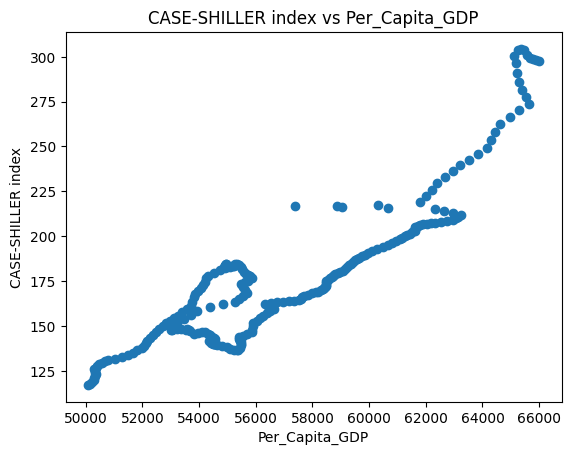

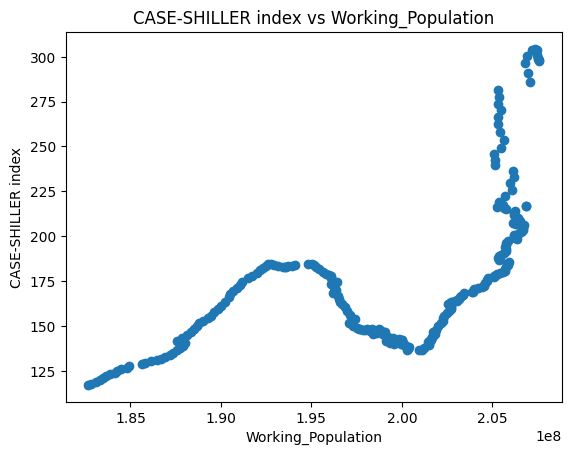

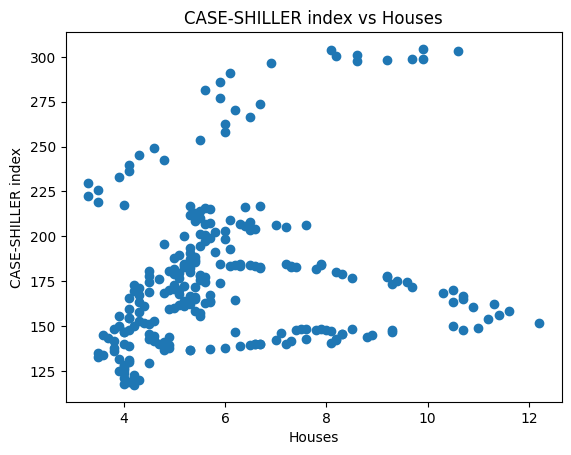

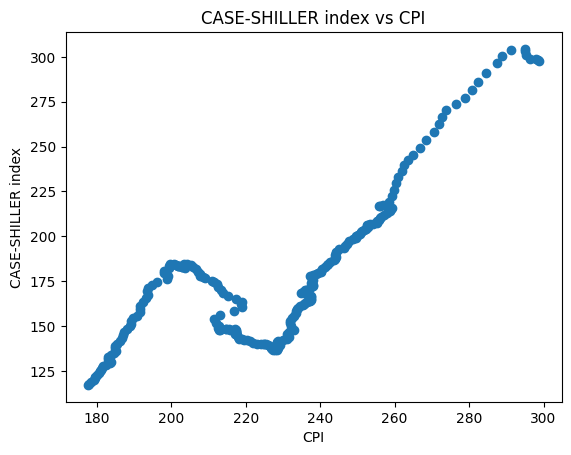

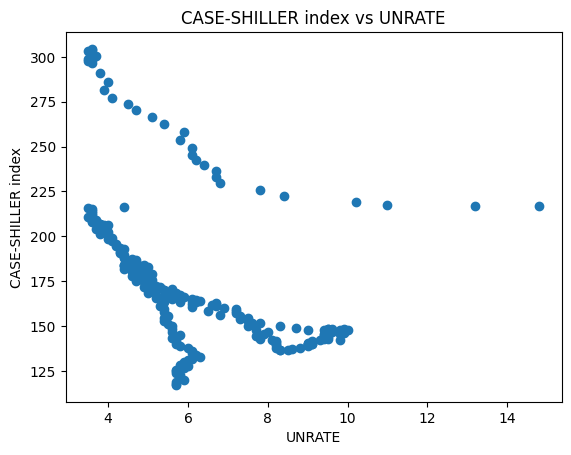

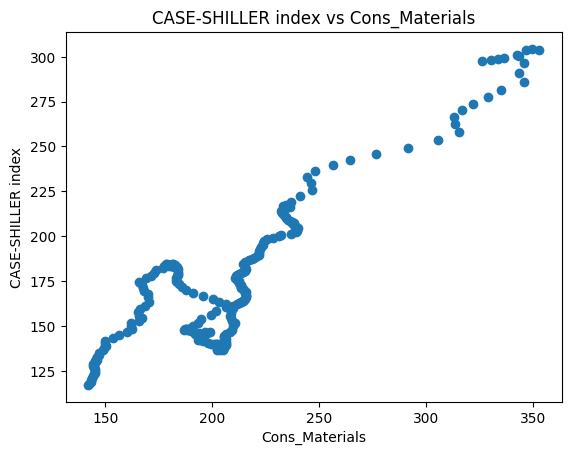

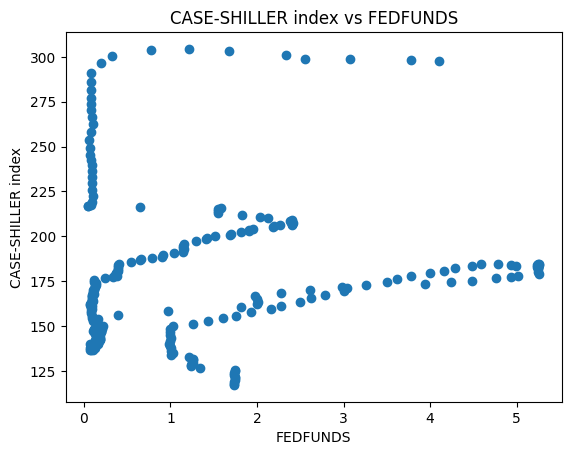

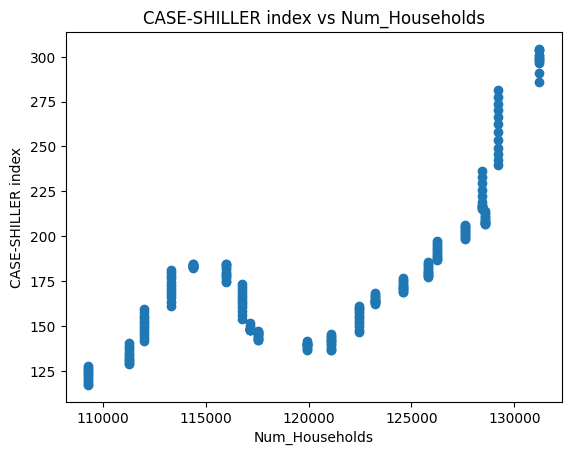

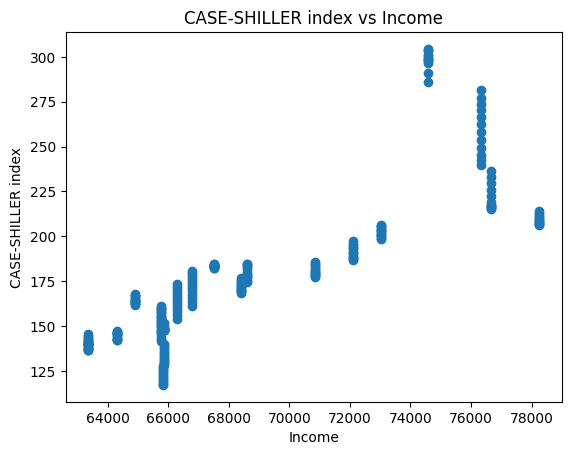

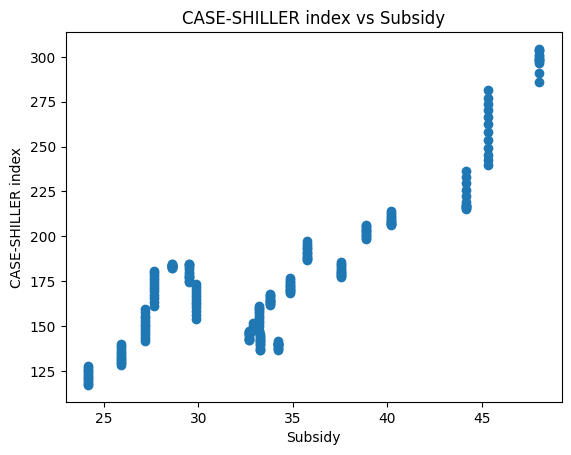

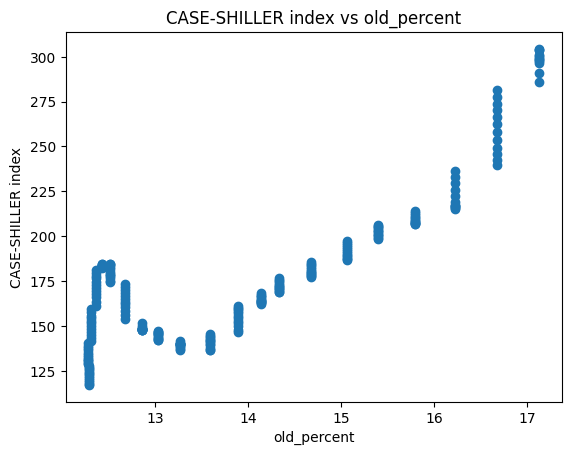

In [12]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

In [13]:
#Splitting the data into training and validation sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
# Fitting the Linear Regression Model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
#making predictions on the Linear Regressor Model
prediction=model.predict(X_test)
print(prediction)

[167.02591601 130.49833968 148.49478001 177.45721175 149.28745843
 182.43306765 211.28238921 271.52236321 130.46027966 147.6285257
 181.70798362 204.61096903 222.79646166 167.88075081 181.8854927
 158.16944639 208.40483501 127.81545343 151.43562621 136.58224343
 145.25327597 131.86011425 151.10118416 150.2588502  154.25931419
 288.66261692 186.09049849 180.84889466 128.21636626 167.7075094
 153.32446446 143.29709318 150.25174788 149.14938813 220.79861053
 139.19305849 146.17409905 130.87281437 220.49168147 180.98894325
 182.59096918 150.00021337 167.40991545 153.84235415 168.44103824
 179.94578687 129.10527342 183.87885057 154.34546172 179.98953333
 160.7161674 ]


In [16]:
#Checking the accuracy of the model
r2=r2_score(y_test,prediction)
print(r2)

0.9454211225624091


### The Linear Regression model is the most suitable choice for this project because it delivers an impressive accuracy of 94%. This high level of accuracy indicates that the model is highly effective at predicting US housing prices based on the available data. By leveraging Linear Regression, we can confidently analyze and understand the key factors influencing housing prices.